In [144]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import plotly.express as px 

from sklearn.impute import KNNImputer ,SimpleImputer
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,MinMaxScaler,StandardScaler

plt.style.use('fivethirtyeight')

In [145]:
df = pd.read_csv('cars.csv')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Dimensions.Height                                5076 non-null   int64 
 1   Dimensions.Length                                5076 non-null   int64 
 2   Dimensions.Width                                 5076 non-null   int64 
 3   Engine Information.Driveline                     5076 non-null   object
 4   Engine Information.Engine Type                   5076 non-null   object
 5   Engine Information.Hybrid                        5076 non-null   bool  
 6   Engine Information.Number of Forward Gears       5076 non-null   int64 
 7   Engine Information.Transmission                  5076 non-null   object
 8   Fuel Information.City mpg                        5076 non-null   int64 
 9   Fuel Information.Fuel Type               

In [147]:
df.describe()

Dimensions.Height  Dimensions.Length  Dimensions.Width  \
count        5076.000000        5076.000000       5076.000000   
mean          145.632191         127.825847        144.012411   
std            62.125026          77.358295         79.925899   
min             1.000000           2.000000          1.000000   
25%           104.000000          60.000000         62.000000   
50%           152.000000         128.000000        158.000000   
75%           193.000000         198.000000        219.000000   
max           255.000000         255.000000        254.000000   

       Engine Information.Number of Forward Gears  Fuel Information.City mpg  \
count                                 5076.000000                5076.000000   
mean                                     5.519110                  17.275808   
std                                      0.845637                   4.479485   
min                                      4.000000                   8.000000   
25%                                      5.000000                  14.000000   
50%                                      6.000000                  17.000000   
75%                                      6.000000                  20.000000   
max                                      8.000000                  38.000000   

       Fuel Information.Highway mpg  Identification.Year  \
count                   5076.000000          5076.000000   
mean                      24.125493          2010.867612   
std                        6.488293             0.782951   
min                       11.000000          2009.000000   
25%                       20.000000          2010.000000   
50%                       24.000000          2011.000000   
75%                       28.000000          2011.000000   
max                      223.000000          2012.000000   

       Engine Information.Engine Statistics.Horsepower  \
count                                      5076.000000   
mean                                        270.499409   
std                                          95.293537   
min                                         100.000000   
25%                                         190.000000   
50%                                         266.000000   
75%                                         317.000000   
max                                         638.000000   

       Engine Information.Engine Statistics.Torque  
count                                  5076.000000  
mean                                    272.707250  
std                                     100.123328  
min                                      98.000000  
25%                                     187.000000  
50%                                     260.000000  
75%                                     335.000000  
max                                     774.000000

In [148]:
df.describe(include = 'object')

Engine Information.Driveline  \
count                          5076   
unique                            4   
top                Rear-wheel drive   
freq                           1751   

                     Engine Information.Engine Type  \
count                                          5076   
unique                                          535   
top     Chevrolet 6.2L 8 Cylinder 430 hp 424 ft-lbs   
freq                                             96   

       Engine Information.Transmission Fuel Information.Fuel Type  \
count                             5076                       5076   
unique                              11                          4   
top     6 Speed Automatic Select Shift                   Gasoline   
freq                              1313                       4591   

       Identification.Classification                       Identification.ID  \
count                           5076                                    5076   
unique                             2                                    5030   
top           Automatic transmission  2010 Mercedes-Benz R350 BlueTEC 4Matic   
freq                            3949                                       3   

       Identification.Make Identification.Model Year  
count                 5076                      5076  
unique                  47                       918  
top              Chevrolet           2011 Ford F-150  
freq                   626                       116

In [149]:
df.head()

Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0                140                143               202   
1                140                143               202   
2                140                143               202   
3                140                143               202   
4                140                143               202   

  Engine Information.Driveline                Engine Information.Engine Type  \
0              All-wheel drive          Audi 3.2L 6 cylinder 250hp 236ft-lbs   
1            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
2            Front-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
3              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   
4              All-wheel drive  Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo   

   Engine Information.Hybrid  Engine Information.Number of Forward Gears  \
0                       True                                           6   
1                       True                                           6   
2                       True                                           6   
3                       True                                           6   
4                       True                                           6   

  Engine Information.Transmission  Fuel Information.City mpg  \
0  6 Speed Automatic Select Shift                         18   
1  6 Speed Automatic Select Shift                         22   
2                  6 Speed Manual                         21   
3  6 Speed Automatic Select Shift                         21   
4  6 Speed Automatic Select Shift                         21   

  Fuel Information.Fuel Type  Fuel Information.Highway mpg  \
0                   Gasoline                            25   
1                   Gasoline                            28   
2                   Gasoline                            30   
3                   Gasoline                            28   
4                   Gasoline                            28   

  Identification.Classification           Identification.ID  \
0        Automatic transmission            2009 Audi A3 3.2   
1        Automatic transmission       2009 Audi A3 2.0 T AT   
2           Manual transmission          2009 Audi A3 2.0 T   
3        Automatic transmission  2009 Audi A3 2.0 T Quattro   
4        Automatic transmission  2009 Audi A3 2.0 T Quattro   

  Identification.Make Identification.Model Year  Identification.Year  \
0                Audi              2009 Audi A3                 2009   
1                Audi              2009 Audi A3                 2009   
2                Audi              2009 Audi A3                 2009   
3                Audi              2009 Audi A3                 2009   
4                Audi              2009 Audi A3                 2009   

   Engine Information.Engine Statistics.Horsepower  \
0                                              250   
1                                              200   
2                                              200   
3                                              200   
4                                              200   

   Engine Information.Engine Statistics.Torque  
0                                          236  
1                                          207  
2                                          207  
3                                          207  
4                                          207

In [150]:
df.isnull().sum()

Dimensions.Height                                  0
Dimensions.Length                                  0
Dimensions.Width                                   0
Engine Information.Driveline                       0
Engine Information.Engine Type                     0
Engine Information.Hybrid                          0
Engine Information.Number of Forward Gears         0
Engine Information.Transmission                    0
Fuel Information.City mpg                          0
Fuel Information.Fuel Type                         0
Fuel Information.Highway mpg                       0
Identification.Classification                      0
Identification.ID                                  0
Identification.Make                                0
Identification.Model Year                          0
Identification.Year                                0
Engine Information.Engine Statistics.Horsepower    0
Engine Information.Engine Statistics.Torque        0
dtype: int64

In [151]:
enc = LabelEncoder()

In [152]:
df['Engine Information.Driveline'] = enc.fit_transform(df['Engine Information.Driveline'])
df['Engine Information.Engine Type'] = enc.fit_transform(df['Engine Information.Engine Type'])
df['Engine Information.Transmission'] = enc.fit_transform(df['Engine Information.Transmission'])
df['Fuel Information.Fuel Type'] = enc.fit_transform(df['Fuel Information.Fuel Type'])
df['Identification.Classification'] = enc.fit_transform(df['Identification.Classification'])
df['Identification.ID'] = enc.fit_transform(df['Identification.ID'])
df['Identification.Make'] = enc.fit_transform(df['Identification.Make'])
df['Identification.Model Year'] = enc.fit_transform(df['Identification.Model Year'])
df['Engine Information.Hybrid'] = enc.fit_transform(df['Engine Information.Hybrid'])

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5076 entries, 0 to 5075
Data columns (total 18 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   Dimensions.Height                                5076 non-null   int64
 1   Dimensions.Length                                5076 non-null   int64
 2   Dimensions.Width                                 5076 non-null   int64
 3   Engine Information.Driveline                     5076 non-null   int32
 4   Engine Information.Engine Type                   5076 non-null   int32
 5   Engine Information.Hybrid                        5076 non-null   int64
 6   Engine Information.Number of Forward Gears       5076 non-null   int64
 7   Engine Information.Transmission                  5076 non-null   int32
 8   Fuel Information.City mpg                        5076 non-null   int64
 9   Fuel Information.Fuel Type                       507

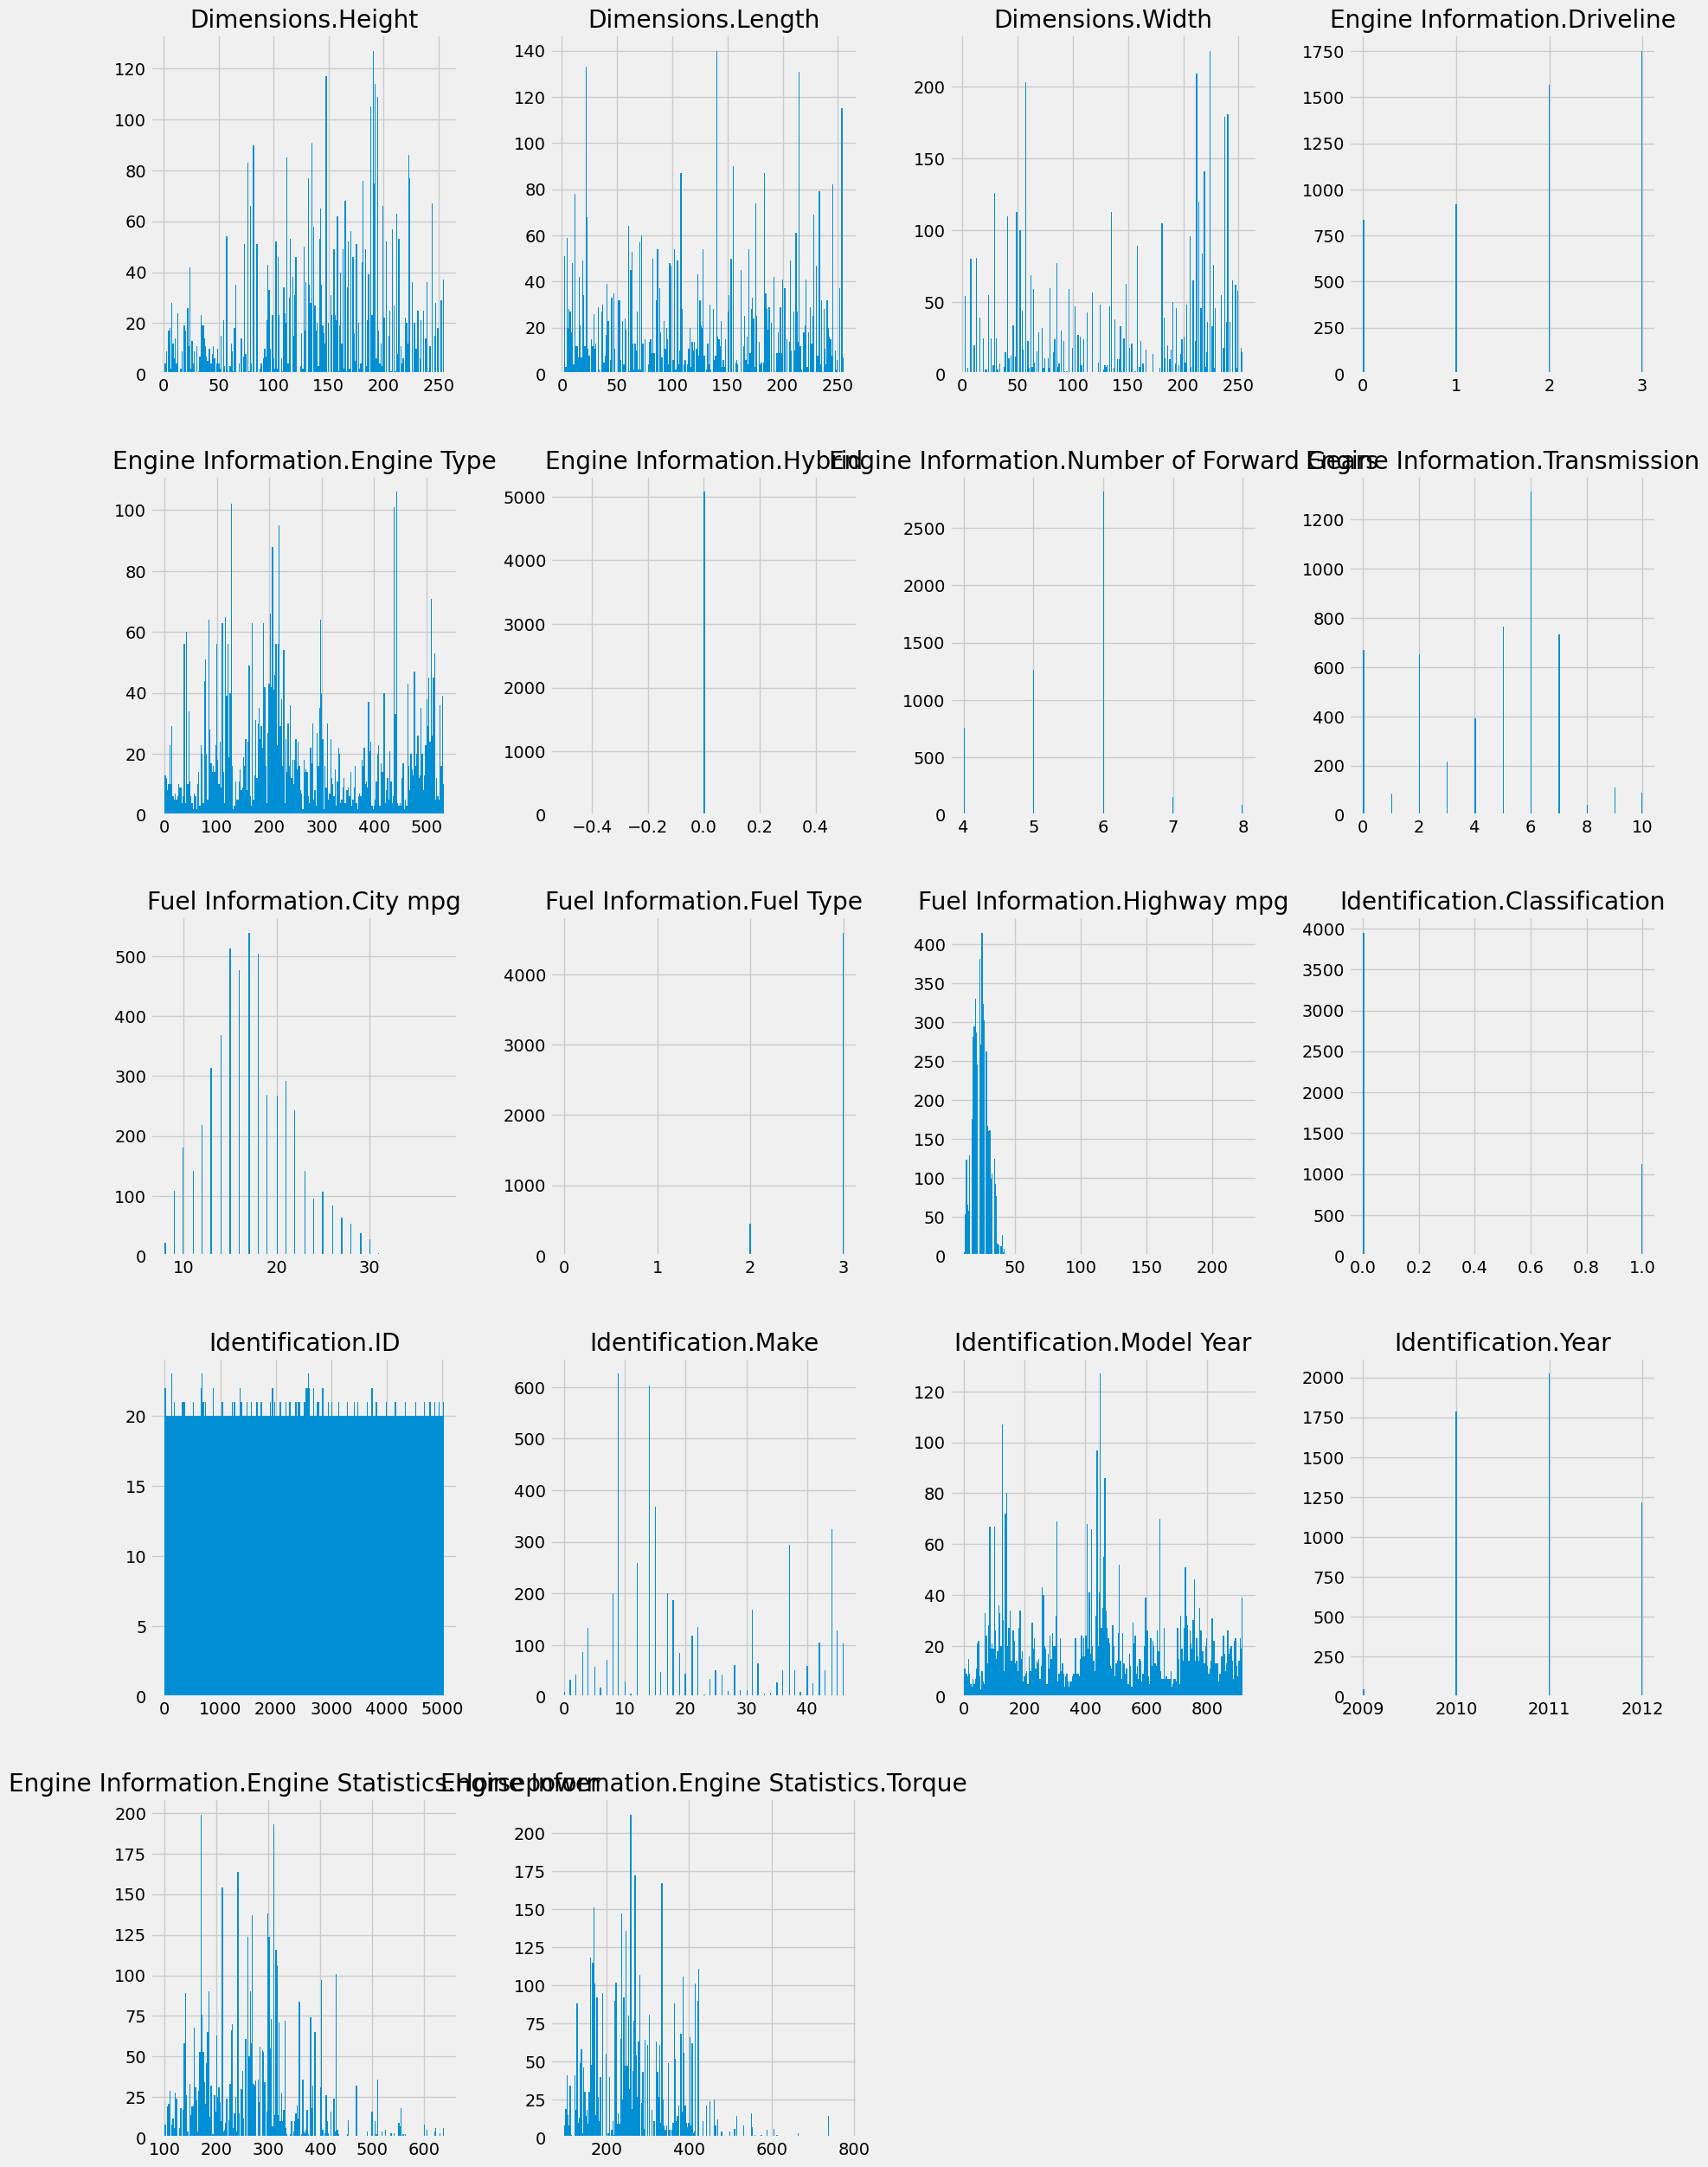

In [154]:
df.hist(bins = 250 , figsize = (20,30))
plt.show()

In [155]:
multi_impute_df = df.copy()

In [156]:
new_df = multi_impute_df.copy()

In [157]:

def IQR(column_name):
    Q1 = new_df[column_name].quantile(0.25)
    Q3 = new_df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    values_upper = new_df[new_df[column_name] > upper_limit]
    values_lower = new_df[new_df[column_name] < lower_limit]
    
    return values_upper, values_lower, upper_limit, lower_limit

# this function will delete any outliers upper or lower the limit
def outliers_del(column_name):
    # we will make new_df global to consider the global variable not the local
    global new_df
    new_df = new_df[new_df[column_name] < upper_limit]
    new_df = new_df[new_df[column_name] > lower_limit]
    print("the old data shape is :", df.shape)
    print("the new data shape is :", new_df.shape)
    
    
def upper(column_name):
    if values_upper.shape[0] > 0:
        print("Outliers upper than the higher limit: ")
        return new_df[new_df[column_name] > upper_limit]
    else:
        print("There are no values higher than the upper limit!")
        
        
        
def lower(column_name):
    if values_lower.shape[0] > 0:
        print("Outliers lower than the higher limit: ")
        return new_df[new_df[column_name] < lower_limit]
    else:
        print("There are no values lower than the lower limit!")
        
        
def outlier_compare(column_name):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(25,15))
    plt.subplot(2,2,1)
    sns.boxplot(x=new_df[column_name])
    plt.subplot(2,2,2)
    sns.boxplot(x=df[column_name])
    plt.show()

    

the old data shape is : (5076, 18)
the new data shape is : (5040, 18)


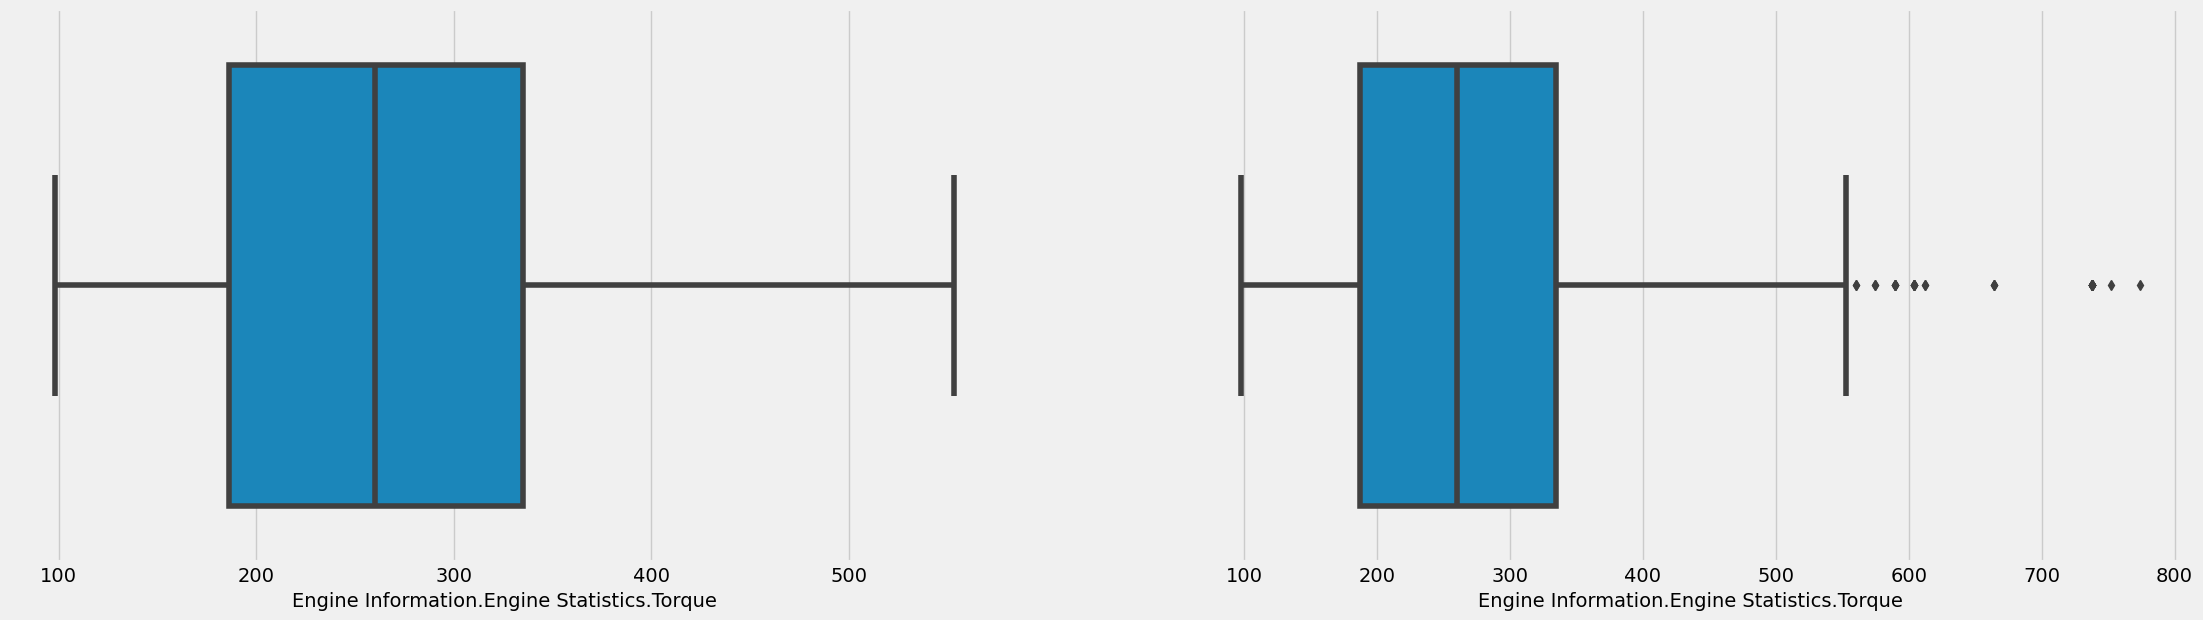

In [158]:
values_upper, values_lower, upper_limit, lower_limit = IQR('Engine Information.Engine Statistics.Torque')
outliers_del('Engine Information.Engine Statistics.Torque')
outlier_compare('Engine Information.Engine Statistics.Torque')

the old data shape is : (5076, 18)
the new data shape is : (4948, 18)


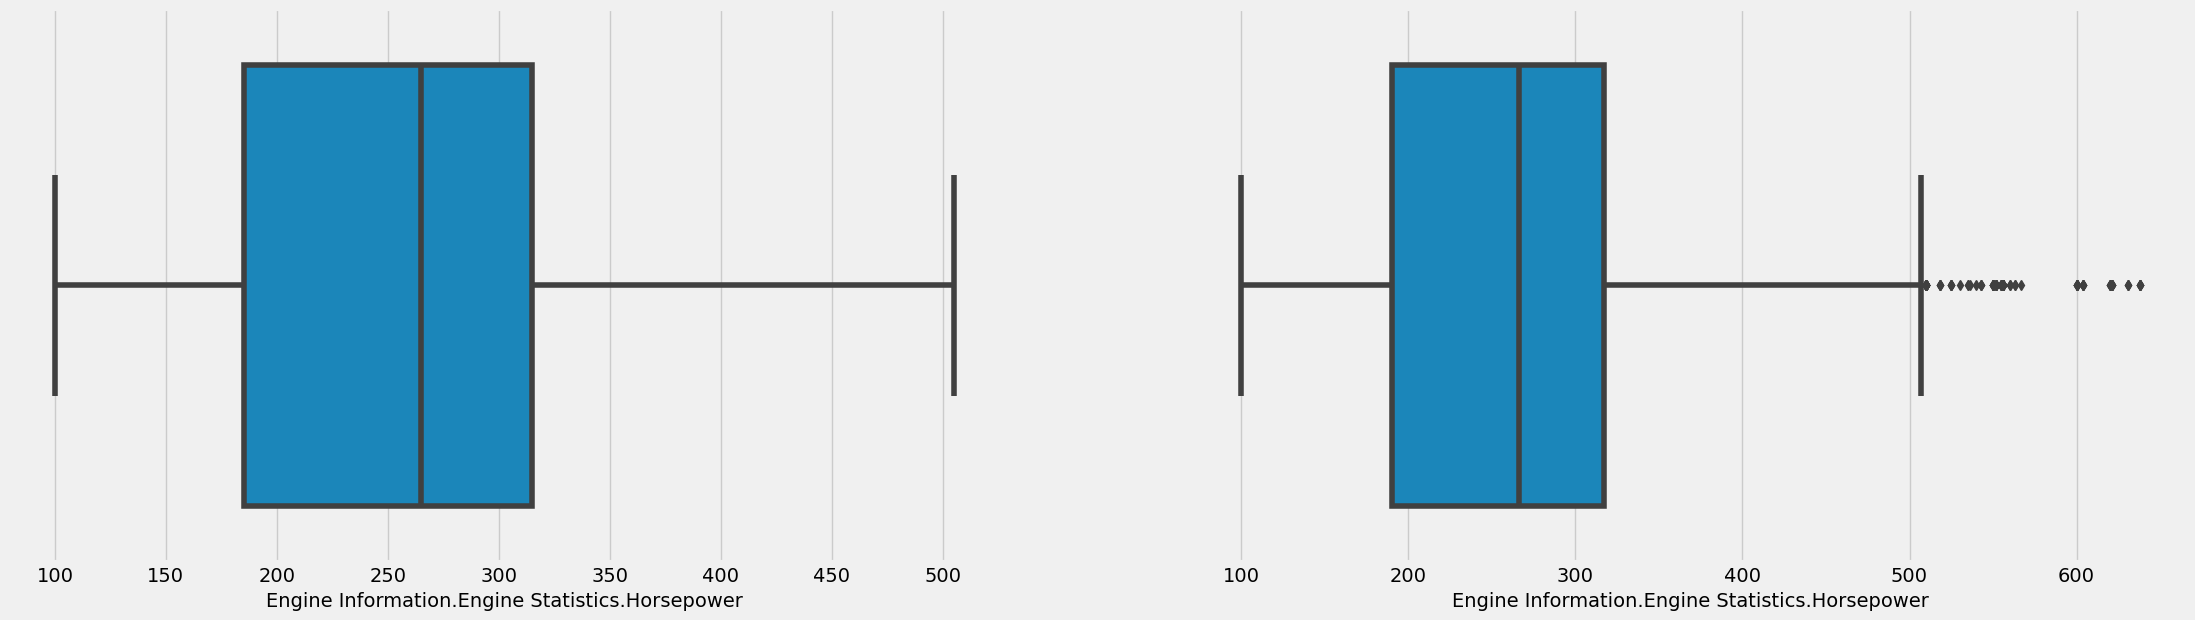

In [159]:
values_upper ,values_lower , upper_limit,lower_limit = IQR('Engine Information.Engine Statistics.Horsepower')
outliers_del('Engine Information.Engine Statistics.Horsepower')
outlier_compare('Engine Information.Engine Statistics.Horsepower')

the old data shape is : (5076, 18)
the new data shape is : (4948, 18)


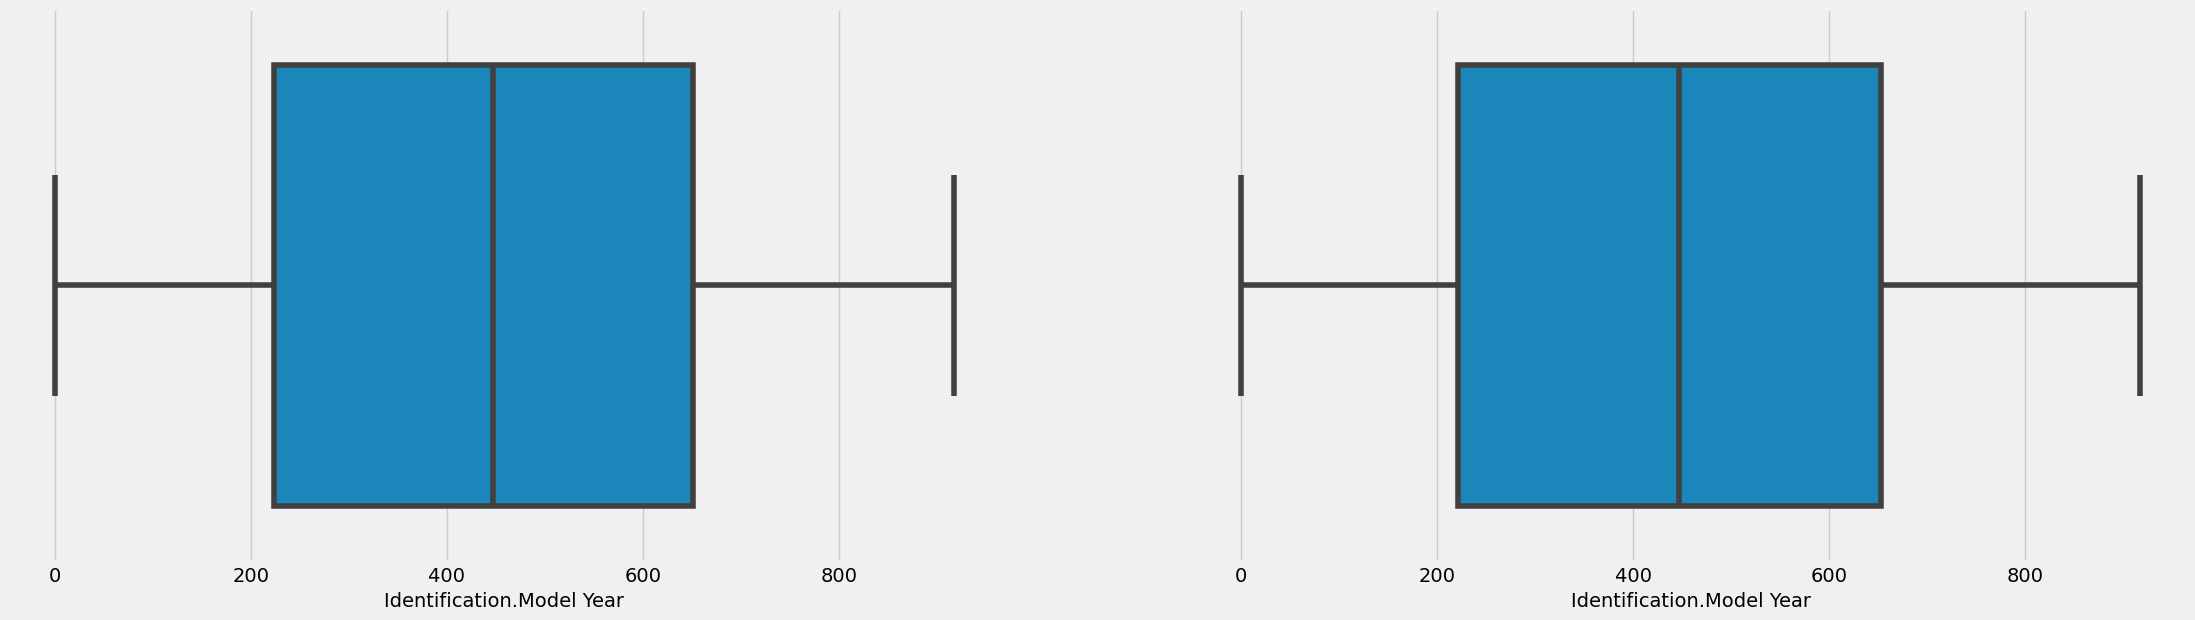

In [160]:
values_upper  , values_lower  , upper_limit  , lower_limit = IQR('Identification.Model Year')
outliers_del('Identification.Model Year')
outlier_compare('Identification.Model Year')

the old data shape is : (5076, 18)
the new data shape is : (4948, 18)


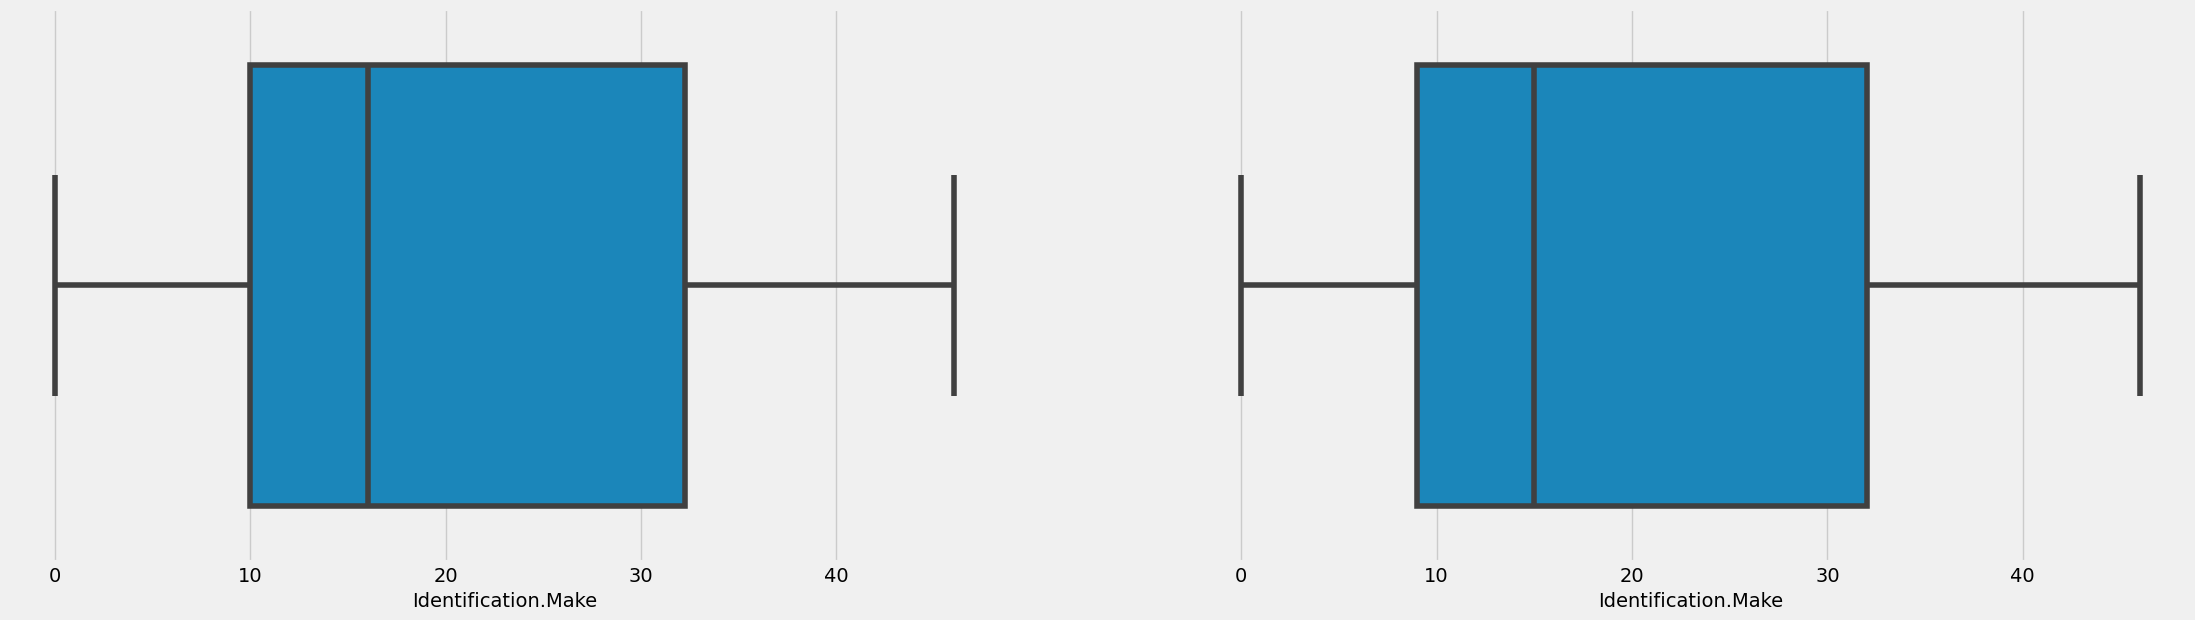

In [161]:
values_upper ,values_lower , uipper_limit,lower_limit = IQR('Identification.Make')
outliers_del('Identification.Make')
outlier_compare('Identification.Make')

the old data shape is : (5076, 18)
the new data shape is : (1268, 18)


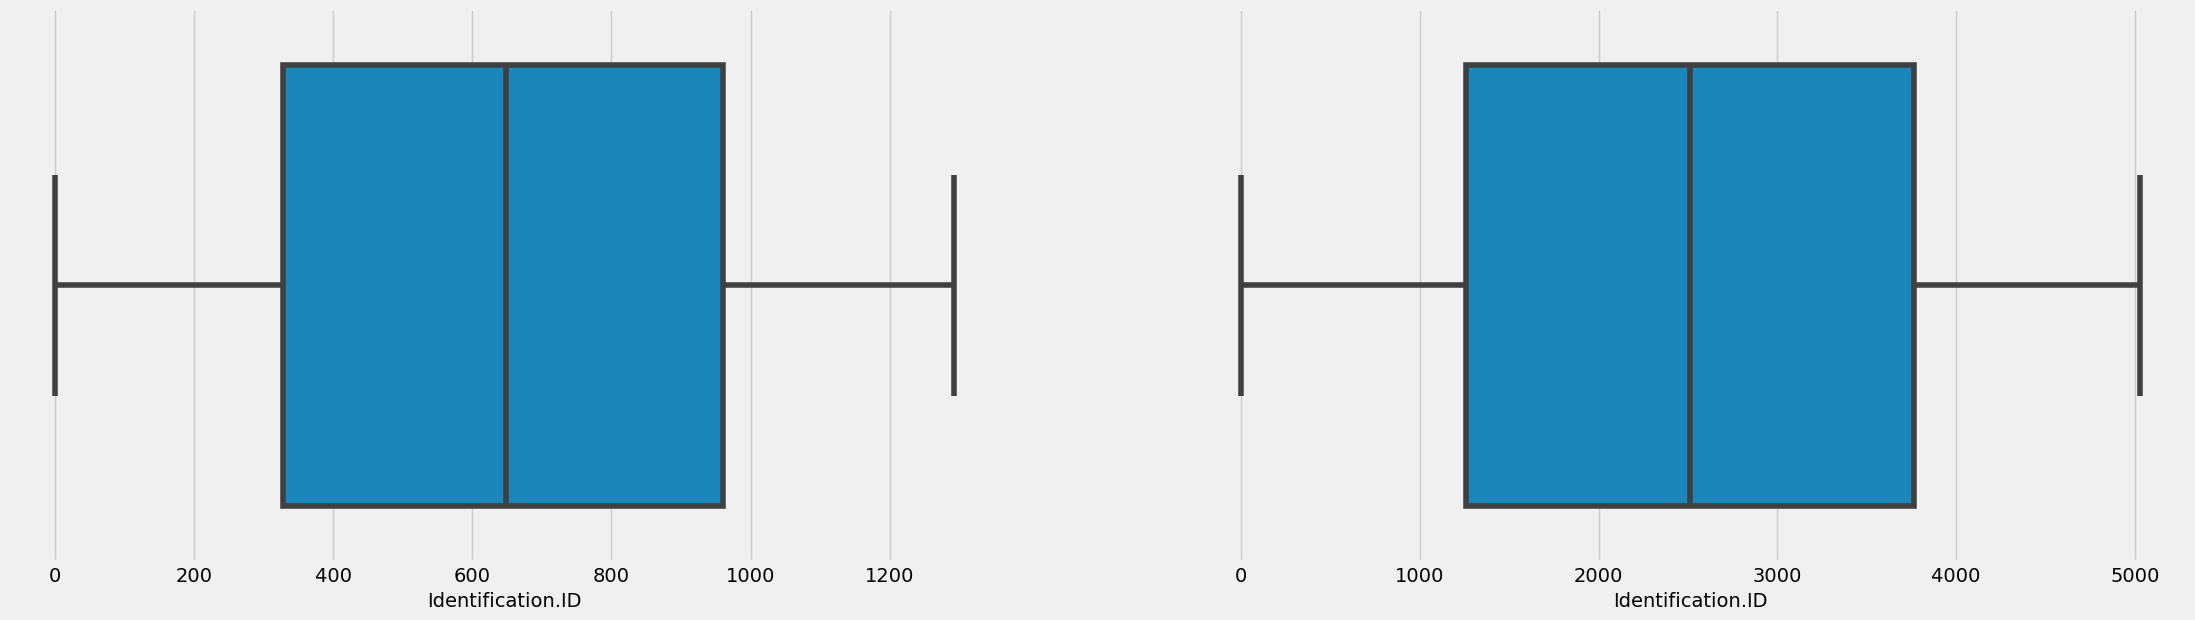

In [162]:
values_upper ,values_lower , uipper_limit,lower_limit = IQR('Identification.ID')
outliers_del('Identification.ID')
outlier_compare('Identification.ID')

the old data shape is : (5076, 18)
the new data shape is : (1268, 18)


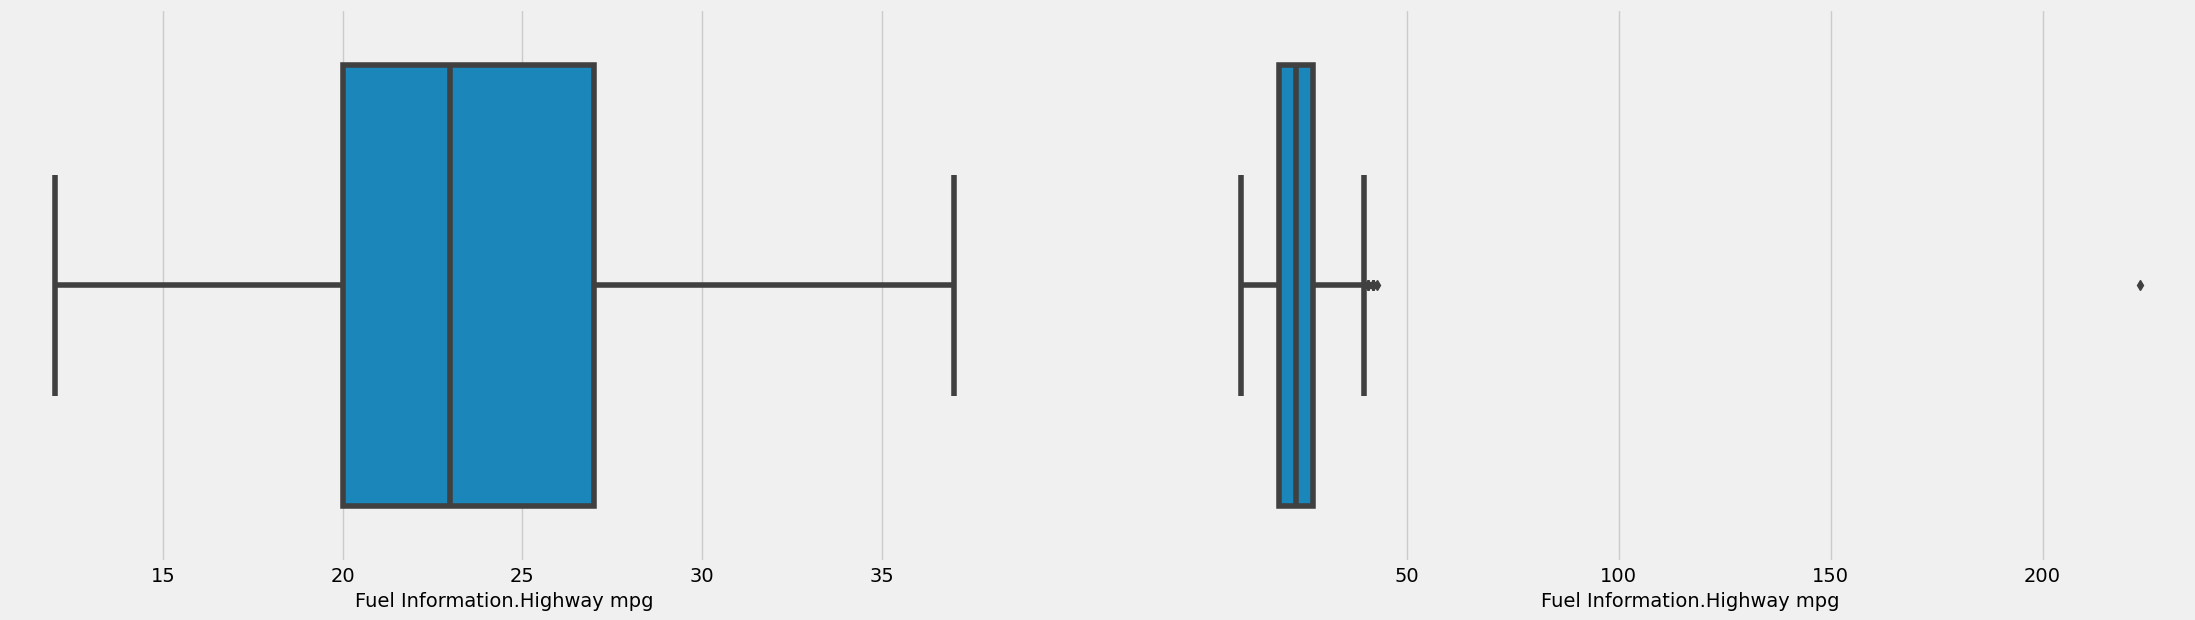

In [163]:
values_upper ,values_lower , uipper_limit,lower_limit = IQR('Fuel Information.Highway mpg')
outliers_del('Fuel Information.Highway mpg')
outlier_compare('Fuel Information.Highway mpg')

the old data shape is : (5076, 18)
the new data shape is : (1268, 18)


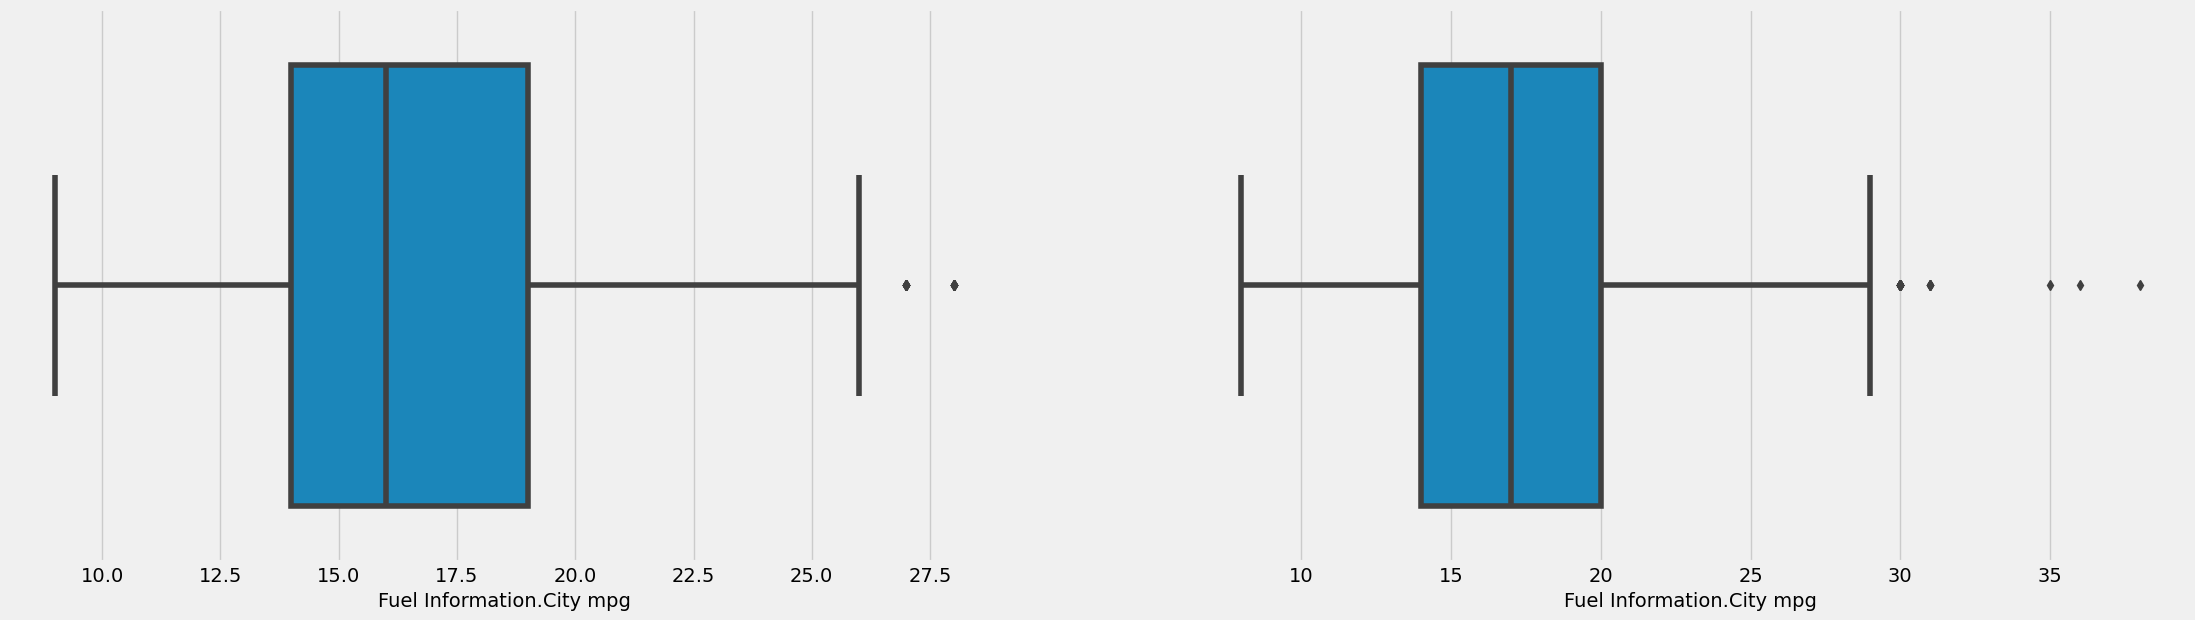

In [164]:
values_upper ,values_lower , uipper_limit,lower_limit = IQR('Fuel Information.City mpg')
outliers_del('Fuel Information.City mpg')
outlier_compare('Fuel Information.City mpg')

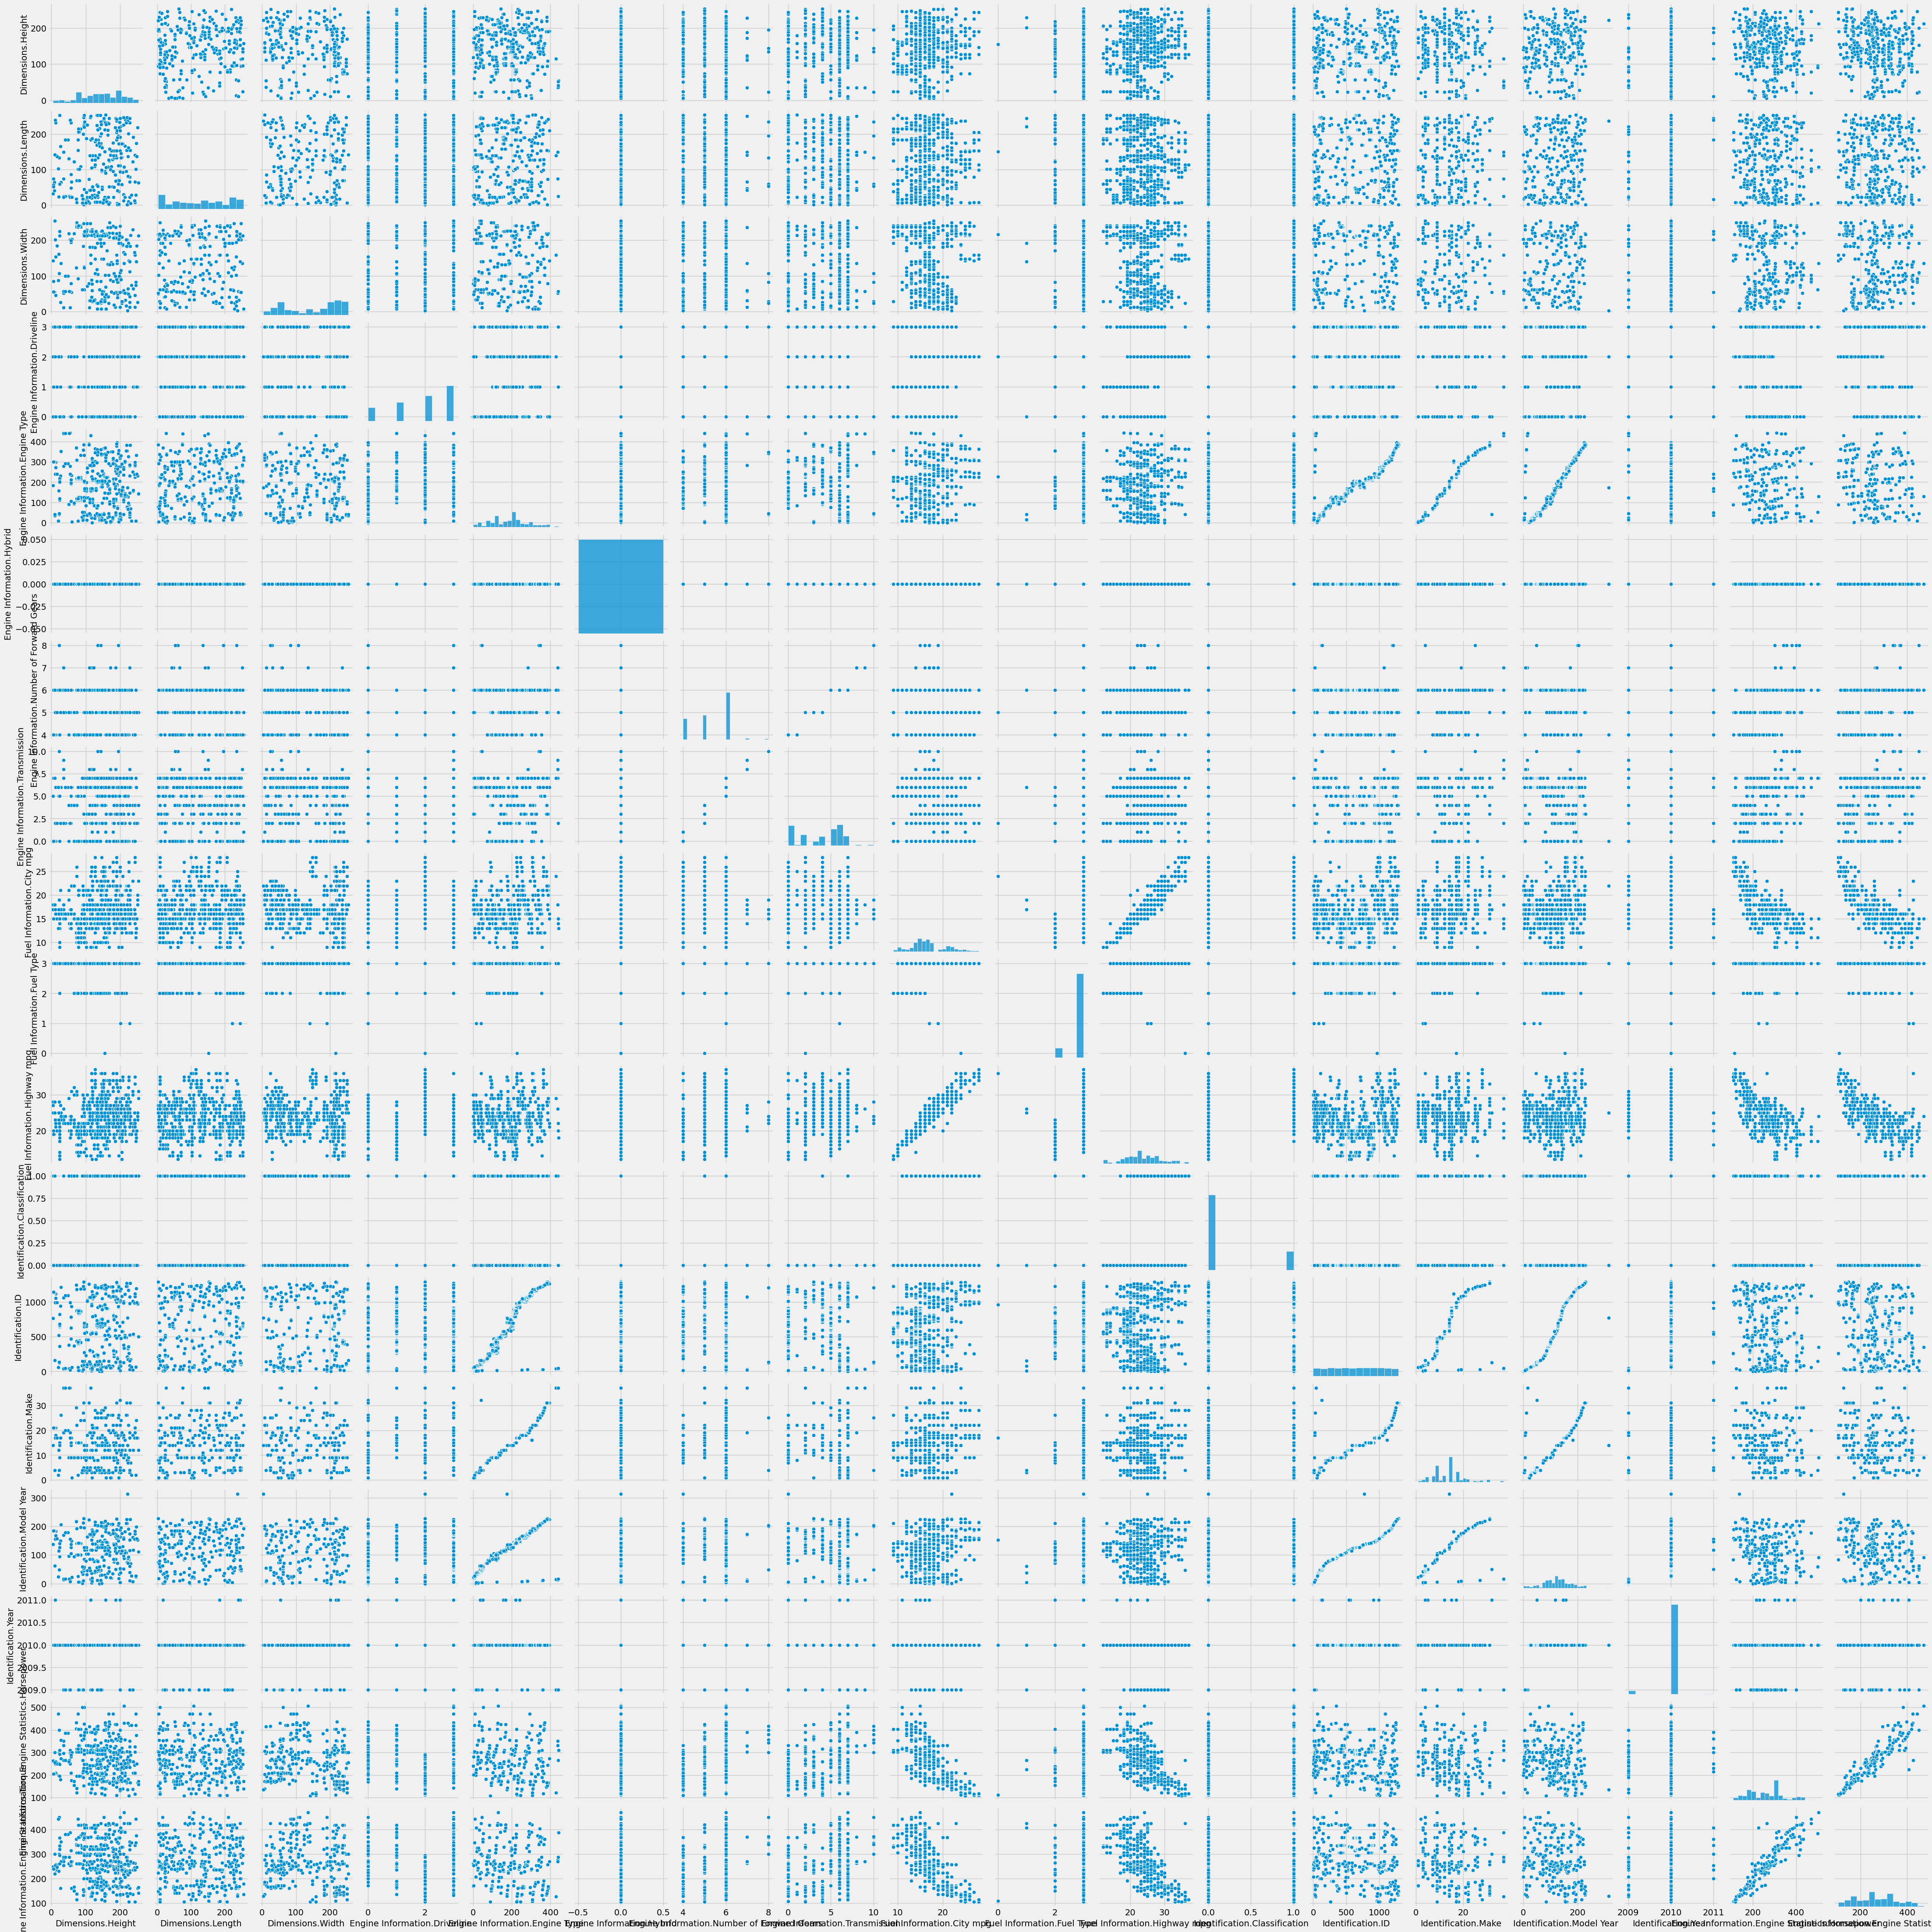

In [165]:
sns.pairplot(new_df)
plt.show()

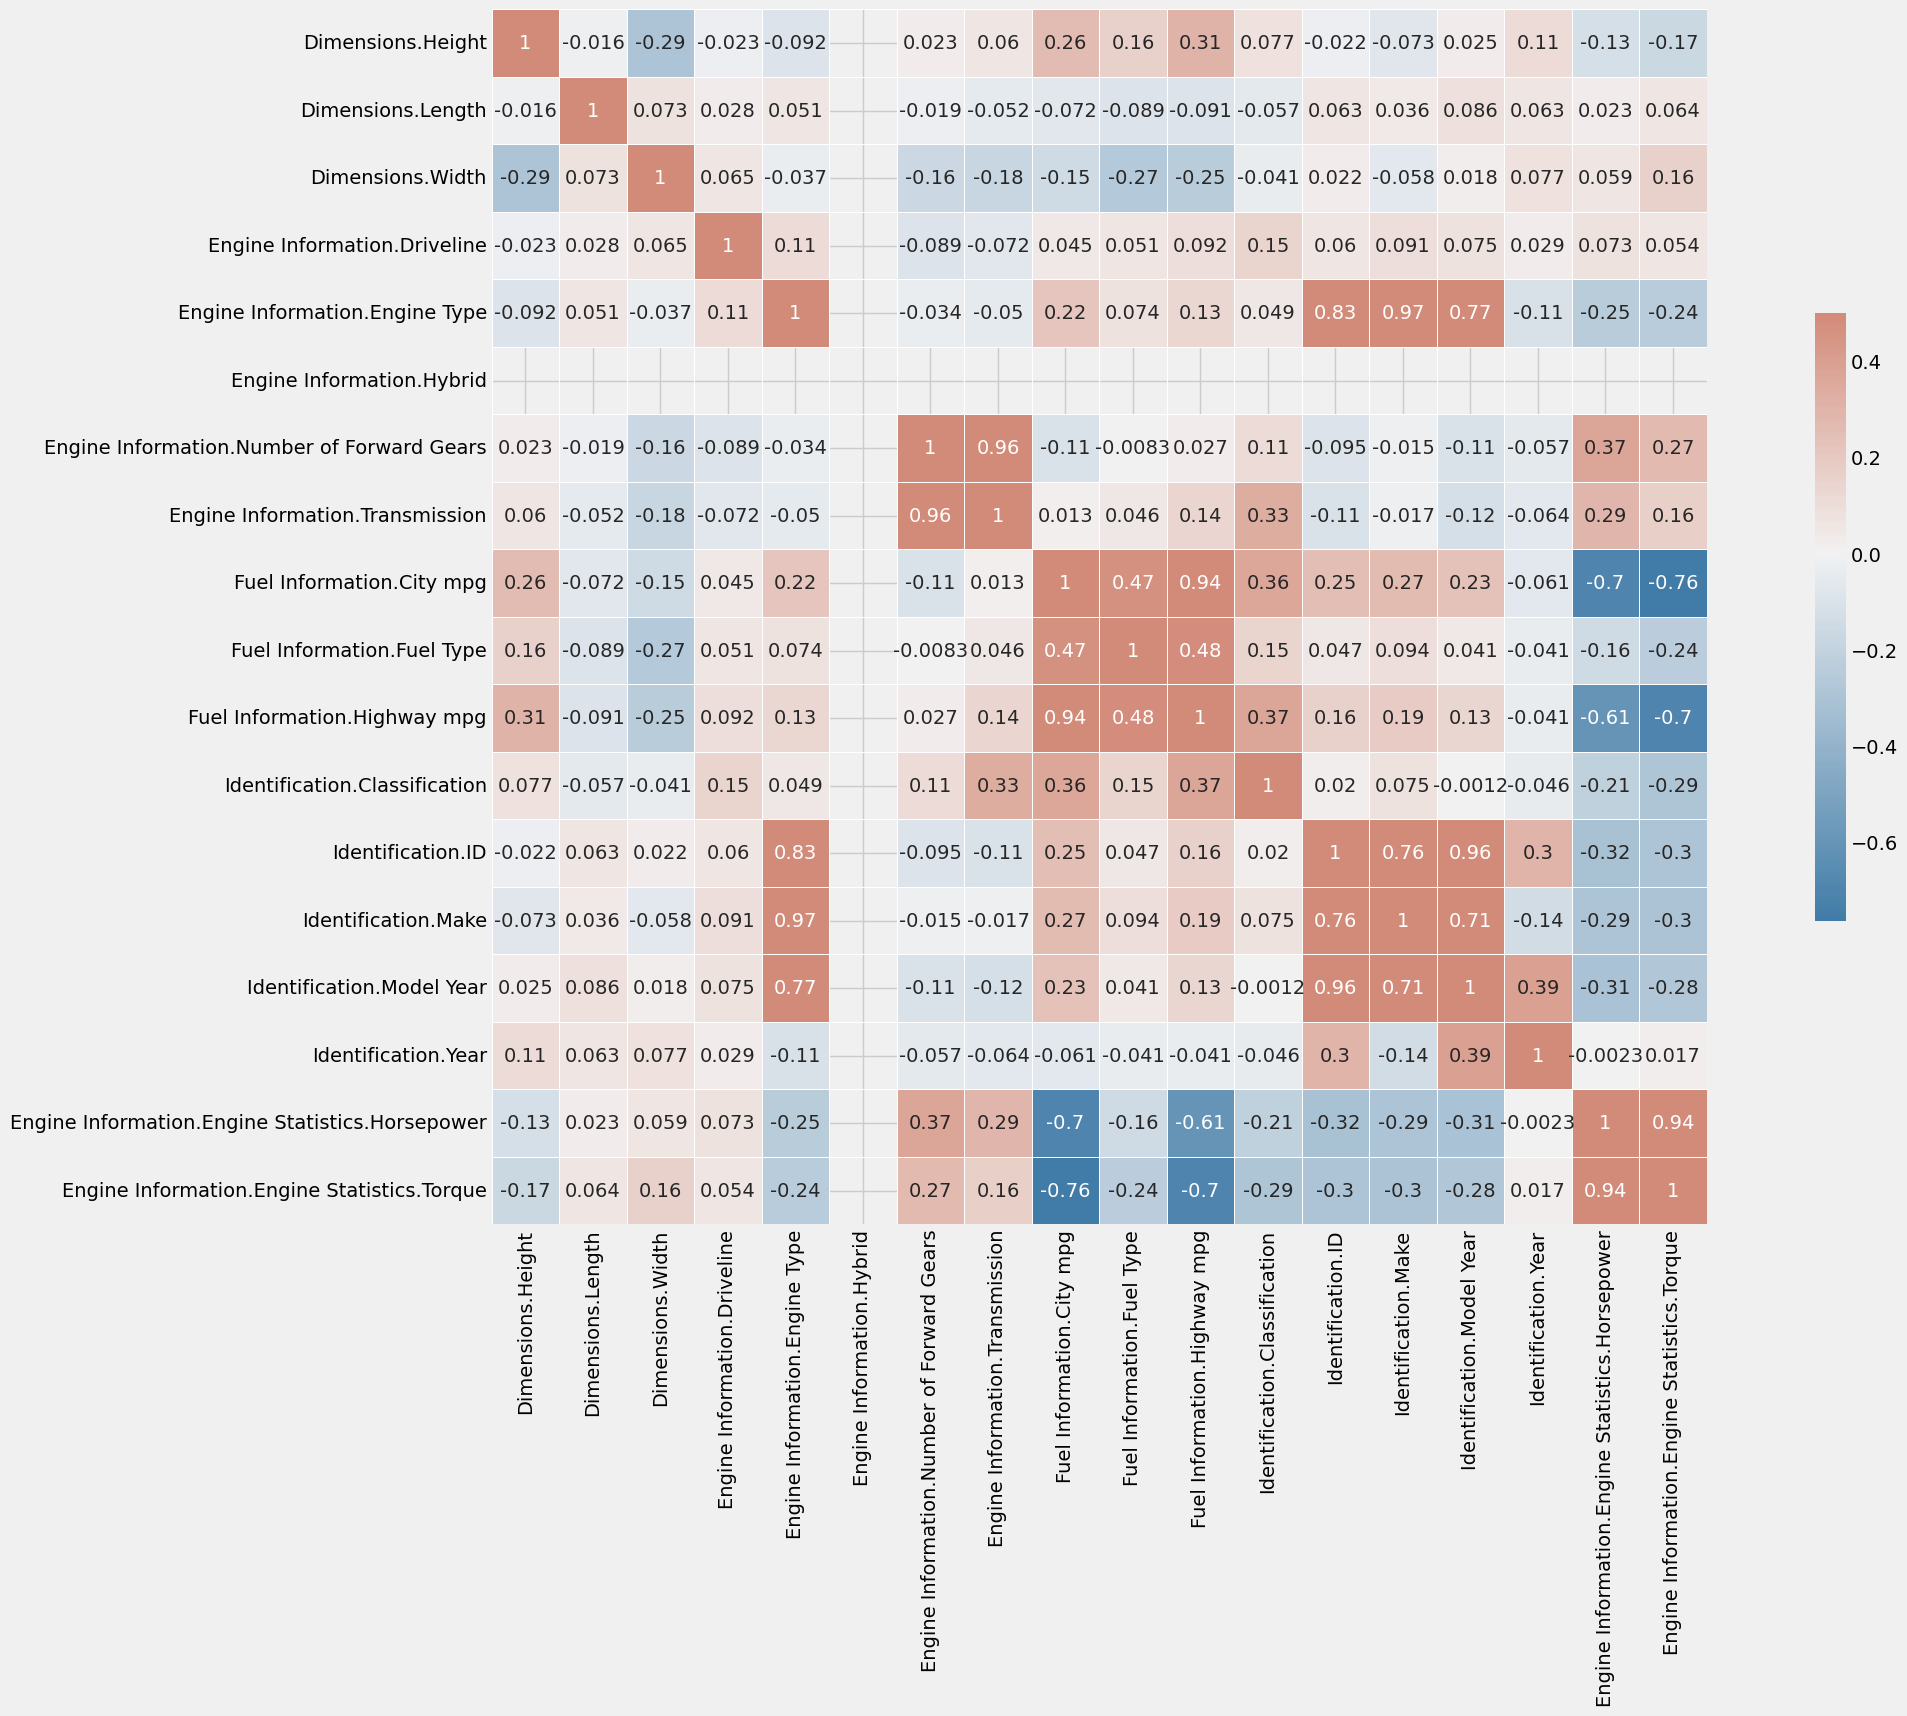

In [166]:
corr_matrix = new_df.corr()
f, ax = plt.subplots(figsize=(25, 15))
cmap = sns.diverging_palette(240, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.5, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [167]:
x = df.drop("Fuel Information.City mpg" , axis = 1)
y = df['Fuel Information.City mpg']

In [168]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42)

In [169]:
lr = LinearRegression()

In [170]:
lr.fit(x_train,y_train)

LinearRegression()

In [171]:
lr.score(x_train,y_train)

0.8362560449370944

In [173]:
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [174]:
normalizer = MinMaxScaler(feature_range=(0,1))
data = normalizer.fit_transform(new_df)
scaled_df = pd.DataFrame(data, columns=new_df.columns)
scaled_df.head()

Dimensions.Height  Dimensions.Length  Dimensions.Width  \
0           0.542169           0.557312          0.792829   
1           0.542169           0.557312          0.792829   
2           0.542169           0.557312          0.792829   
3           0.542169           0.557312          0.792829   
4           0.542169           0.557312          0.792829   

   Engine Information.Driveline  Engine Information.Engine Type  \
0                      0.000000                        0.049774   
1                      0.666667                        0.029412   
2                      0.666667                        0.029412   
3                      0.000000                        0.029412   
4                      0.000000                        0.029412   

   Engine Information.Hybrid  Engine Information.Number of Forward Gears  \
0                        0.0                                         0.5   
1                        0.0                                         0.5   
2                        0.0                                         0.5   
3                        0.0                                         0.5   
4                        0.0                                         0.5   

   Engine Information.Transmission  Fuel Information.City mpg  \
0                              0.6                   0.473684   
1                              0.6                   0.684211   
2                              0.7                   0.631579   
3                              0.6                   0.631579   
4                              0.6                   0.631579   

   Fuel Information.Fuel Type  Fuel Information.Highway mpg  \
0                         1.0                          0.52   
1                         1.0                          0.64   
2                         1.0                          0.72   
3                         1.0                          0.64   
4                         1.0                          0.64   

   Identification.Classification  Identification.ID  Identification.Make  \
0                            0.0           0.002322             0.055556   
1                            0.0           0.000774             0.055556   
2                            1.0           0.000000             0.055556   
3                            0.0           0.001548             0.055556   
4                            0.0           0.001548             0.055556   

   Identification.Model Year  Identification.Year  \
0                        0.0                  0.0   
1                        0.0                  0.0   
2                        0.0                  0.0   
3                        0.0                  0.0   
4                        0.0                  0.0   

   Engine Information.Engine Statistics.Horsepower  \
0                                         0.357683   
1                                         0.231738   
2                                         0.231738   
3                                         0.231738   
4                                         0.231738   

   Engine Information.Engine Statistics.Torque  
0                                     0.358904  
1                                     0.279452  
2                                     0.279452  
3                                     0.279452  
4                                     0.279452

In [175]:
x = new_df.drop('Fuel Information.City mpg' ,axis = 1)
y = new_df['Fuel Information.City mpg']

In [176]:
x_scaled = scaled_df.drop('Fuel Information.City mpg' , axis = 1)
y_scaled = scaled_df['Fuel Information.City mpg']
x_scaled_train,x_scaled_test,y_scaled_train,y_scaled_test = train_test_split(x,y)

In [177]:
ols = LinearRegression()
ols.fit(x_scaled_train,y_scaled_train)
ols.score(x_scaled_train,y_scaled_train)

0.9316312785787587

In [179]:
knn = KNeighborsRegressor(n_neighbors = 6)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=6)

In [180]:
knn.score(x_train, y_train)

0.8879197261328045

In [181]:
knn.score(x_test, y_test)

0.8353799031880645

In [182]:
y_pred = knn.predict(x_test) 

In [183]:
mean_squared_error(y_test,y_pred)

3.3481087470449173

In [184]:
mean_absolute_error(y_test,y_pred)

1.271210927239296

In [185]:
r2_score(y_test,y_pred)

0.8353799031880645

In [186]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_scaled_train, y_scaled_train)
knn.score(x_scaled_train, y_scaled_train)

0.8955574634025858

In [187]:
knn.score(x_scaled_test, y_scaled_test)

0.8501297926631245

In [188]:
y_pred = knn.predict(x_scaled_test)
mean_squared_error(y_scaled_test, y_pred)

2.700315457413249

In [189]:
mean_absolute_error(y_scaled_test, y_pred)

1.1369085173501576

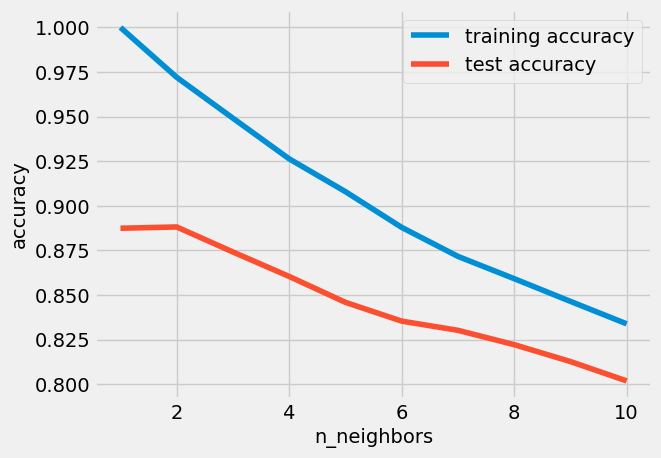

In [190]:
training_accuracy  = []
test_accuracy = []
neighbors_settings  = range(1,11)
for i in neighbors_settings:
    clf= KNeighborsRegressor(n_neighbors = i)
    clf.fit(x_train,y_train)
    
    training_accuracy.append (clf.score(x_train , y_train))
    
    test_accuracy.append(clf.score(x_test,y_test))
    

plt.plot(neighbors_settings,training_accuracy,label = "training accuracy")
plt.plot(neighbors_settings,test_accuracy,label = "test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [193]:
x2 = sm.add_constant(x)
est = sm.OLS(y,x2)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Fuel Information.City mpg   R-squared:                       0.933
Model:                                   OLS   Adj. R-squared:                  0.932
Method:                        Least Squares   F-statistic:                     1095.
Date:                       Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                               20:59:27   Log-Likelihood:                -1881.4
No. Observations:                       1268   AIC:                             3797.
Df Residuals:                           1251   BIC:                             3884.
Df Model:                                 16                                         
Covariance Type:                   nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                            3086.3449    470.305      6.562      0.000    2163.671    4009.019
Dimensions.Height                               -7.345e-06      0.001     -0.013      0.990      -0.001       0.001
Dimensions.Length                                   0.0002      0.000      0.588      0.557      -0.001       0.001
Dimensions.Width                                    0.0037      0.000      8.510      0.000       0.003       0.005
Engine Information.Driveline                       -0.1653      0.031     -5.390      0.000      -0.225      -0.105
Engine Information.Engine Type                     -0.0006      0.002     -0.271      0.786      -0.005       0.004
Engine Information.Hybrid                       -5.119e-08    7.8e-09     -6.562      0.000   -6.65e-08   -3.59e-08
Engine Information.Number of Forward Gears         -0.7333      0.216     -3.402      0.001      -1.156      -0.310
Engine Information.Transmission                     0.1520      0.078      1.961      0.050   -8.75e-05       0.304
Fuel Information.Fuel Type                          0.7434      0.111      6.678      0.000       0.525       0.962
Fuel Information.Highway mpg                        0.6386      0.010     62.314      0.000       0.618       0.659
Identification.Classification                       0.1763      0.136      1.295      0.195      -0.091       0.443
Identification.ID                                8.462e-05      0.000      0.214      0.831      -0.001       0.001
Identification.Make                                 0.0015      0.026      0.058      0.954      -0.050       0.053
Identification.Model Year                           0.0081      0.002      3.356      0.001       0.003       0.013
Identification.Year                                -1.5338      0.234     -6.553      0.000      -1.993      -1.075
Engine Information.Engine Statistics.Horsepower    -0.0095      0.001     -7.399      0.000      -0.012      -0.007
Engine Information.Engine Statistics.Torque         0.0031      0.001      2.421      0.016       0.001       0.006
==============================================================================
Omnibus:                      412.023   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1742.186
Skew:                           1.495   Prob(JB):                         0.00
Kurtosis:                       7.902   Cond. No.                     3.55e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specifi

In [194]:
from statsmodels.stats.outliers_influence  import variance_inflation_factor 

vif_data = pd.DataFrame()
vif_data['feature']=x.columns

vif_data['vif'] =[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

C:\Users\POP\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1754: RuntimeWarning:

invalid value encountered in double_scalars



feature          vif
0                                 Dimensions.Height     8.736250
1                                 Dimensions.Length     3.755750
2                                  Dimensions.Width     5.867555
3                      Engine Information.Driveline     4.825094
4                    Engine Information.Engine Type   219.178070
5                         Engine Information.Hybrid          NaN
6        Engine Information.Number of Forward Gears  1476.912489
7                   Engine Information.Transmission   140.357045
8                        Fuel Information.Fuel Type   115.156610
9                      Fuel Information.Highway mpg    67.391735
10                    Identification.Classification     4.025970
11                                Identification.ID    91.750903
12                              Identification.Make   174.272789
13                        Identification.Model Year   100.609069
14                              Identification.Year  1027.540110
15  Engine Information.Engine Statistics.Horsepower   137.345973
16      Engine Information.Engine Statistics.Torque   143.242780